# Normalisation des données avec Sklearn

Dans ce notebook, on va apprendre à normaliser les données avec sklearn. 

# Importation des packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
class linear_regression():
  def __init__(self, x, seed=None):
    m, n = x.shape
    np.random.seed(seed)
    self._w = np.random.rand(n+1,1)

  def predict(self, x):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    return np.dot(x_1, self._w)

  def compute_cost(self, y, y_hat):

    m, _ = y.shape

    return 1/(2*m) * np.dot((y-y_hat).T, (y-y_hat))

  def fit(self, x, y, learning_rate=0.001, num_iters=200):
    m, n = x.shape
    x_1 = np.hstack((np.ones((m, 1)), x))
    J_history = np.zeros(num_iters)
    
    for i in range(0, num_iters):

      self._w = self._w - (learning_rate/m) * np.dot(x_1.T, (self.predict(x)-y))
      
      J_history[i] = self.compute_cost(self.predict(x), y)
      
    return J_history

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1ghsB3WdBlyLRzvfede0KWDqf9P16KyHl?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
multivariate_regression = np.genfromtxt('/content/drive/MyDrive/Turnover_prediction/multivariate_regression.txt', delimiter=',')

In [ ]:
print("Dimension du jeu de données : "+str(multivariate_regression.shape))

# Etude des variables

## Population de la ville

In [ ]:
multivariate_regression[:, 0]

In [ ]:
print(multivariate_regression[:, 0].mean())
print(multivariate_regression[:, 0].std())

## Note de la ville

In [ ]:
multivariate_regression[:, 1]

In [ ]:
print(multivariate_regression[:, 1].mean())
print(multivariate_regression[:, 1].std())

## Variable cible : chiffre d'affaire

In [ ]:
multivariate_regression[:, 2]

In [ ]:
print(multivariate_regression[:, 2].mean())
print(multivariate_regression[:, 2].std())

# Préparation des données

In [ ]:
x = multivariate_regression[:, :2]
y = multivariate_regression[:, 2].reshape((multivariate_regression.shape[0], 1))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
print("Dimension train : "+str(x_train.shape))
print("Dimension train : "+str(x_test.shape))

Dimension train : (35, 2)
Dimension train : (12, 2)


In [17]:
print("Dimension train : "+str(y_train.shape))
print("Dimension train : "+str(y_test.shape))

Dimension train : (35, 1)
Dimension train : (12, 1)


# Régression linéaire sans normalisation des données

## Problème 1 : Convergence du modèle

In [30]:
lin_reg = linear_regression(x_train)
history = lin_reg.fit(x_train, y_train, learning_rate=0.01, num_iters=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in subtract


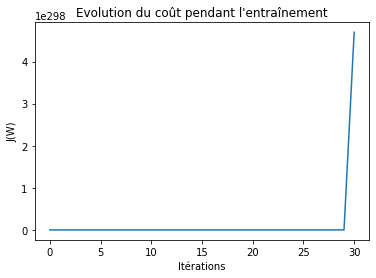

In [31]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

In [32]:
history

array([1.18253791e+020, 2.28793771e+029, 4.42663100e+038, 8.56450853e+047,
       1.65703458e+057, 3.20597917e+066, 6.20282919e+075, 1.20010418e+085,
       2.32192438e+094, 4.49238736e+103, 8.69173191e+112, 1.68164936e+122,
       3.25360309e+131, 6.29497048e+140, 1.21793139e+150, 2.35641592e+159,
       4.55912052e+168, 8.82084515e+177, 1.70662979e+187, 3.30193446e+196,
       6.38848050e+205, 1.23602342e+215, 2.39141982e+224, 4.62684498e+233,
       8.95187633e+242, 1.73198130e+252, 3.35098377e+261, 6.48337959e+270,
       1.25438420e+280, 2.42694369e+289, 4.69557547e+298,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,  

## Problème 2 : interprétabilité du modèle

In [33]:
x_train_small = x_train / 1000
x_test_small = x_test / 1000

In [34]:
print(x_train.mean(axis=0))
print(x_test.mean(axis=0))

[1933.91428571    3.11428571]
[2195.41666667    3.33333333]


In [35]:
print(x_train_small.mean(axis=0))
print(x_test_small.mean(axis=0))

[1.93391429 0.00311429]
[2.19541667 0.00333333]


In [36]:
lin_reg = linear_regression(x_train_small)
history = lin_reg.fit(x_train_small, y_train, learning_rate=0.01, num_iters=300)

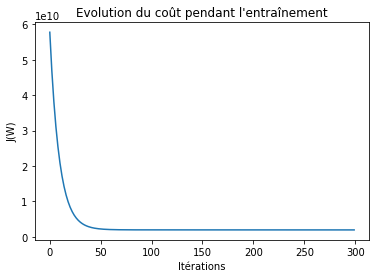

In [37]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

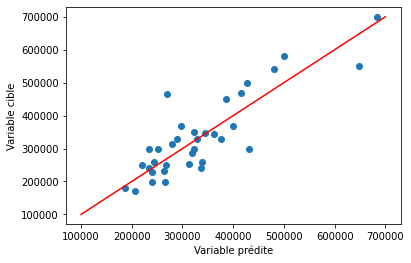

In [38]:
plt.scatter(lin_reg.predict(x_train_small), y_train)
plt.plot(np.arange(100000, 700000), np.arange(100000, 700000), color='red')
plt.ylabel('Variable cible')
plt.xlabel('Variable prédite')
plt.show()

In [39]:
lin_reg._w

array([[ 69973.17941345],
       [136961.56395055],
       [   214.19777467]])

Quelle est la variable la plus importante du modèle ? 

In [40]:
print('Moyenne variable 1 (population) : '+str(x_train_small[:, 0].mean()))
print('Moyenne variable 2 (note) : '+str(x_train_small[:, 1].mean()))

Moyenne variable 1 (population) : 1.9339142857142857
Moyenne variable 2 (note) : 0.003114285714285715


# Normalisation des données avec sklearn

Initialisation de la classe

In [41]:
std = StandardScaler()

Entraînement

In [42]:
std.fit(x_train)

StandardScaler()

In [43]:
print('Mean : '+str(std.mean_))
print('Std : '+str(std.var_))

Mean : [1933.91428571    3.11428571]
Std : [6.58666250e+05 6.15510204e-01]


Application 

In [44]:
x_train_std = std.transform(x_train)

In [45]:
print(x_train.mean(axis=0))
print(x_train.std(axis=0))

[1933.91428571    3.11428571]
[8.11582559e+02 7.84544584e-01]


In [46]:
print(x_train_std.mean(axis=0))
print(x_train_std.std(axis=0))

[-1.48492330e-16 -6.34413157e-17]
[1. 1.]


Transformation unique 

In [47]:
x_train_std = std.fit_transform(x_train)

In [48]:
print(x_train_std.mean(axis=0))
print(x_train_std.std(axis=0))

[-1.48492330e-16 -6.34413157e-17]
[1. 1.]


## Gestion du train et du test

In [49]:
std1 = StandardScaler()
std2 = StandardScaler()

In [50]:
x_train_std = std1.fit_transform(x_train)
x_test_std = std2.fit_transform(x_test)

In [51]:
print('Mean : '+str(std1.mean_))
print('Std : '+str(std1.var_))

Mean : [1933.91428571    3.11428571]
Std : [6.58666250e+05 6.15510204e-01]


In [52]:
print('Mean : '+str(std2.mean_))
print('Std : '+str(std2.var_))

Mean : [2195.41666667    3.33333333]
Std : [4.48914910e+05 3.88888889e-01]


In [53]:
exemple = np.array([100, 1]).reshape(1, 2)
exemple.shape

(1, 2)

In [54]:
std1.transform(exemple)

array([[-2.25967681, -2.69492105]])

In [55]:
std2.transform(exemple)

array([[-3.12743563, -3.74165739]])

## Bonne pratique

In [56]:
# Initialisation
std = StandardScaler()

# Training
std.fit(x_train)

# Transform 
x_train_std = std.transform(x_train)
x_test_std = std.transform(x_test)

# Entraînement d'un modèle de régression linéaire

In [57]:
lin_reg = linear_regression(x_train_std)
history = lin_reg.fit(x_train_std, y_train, learning_rate=0.1, num_iters=100)

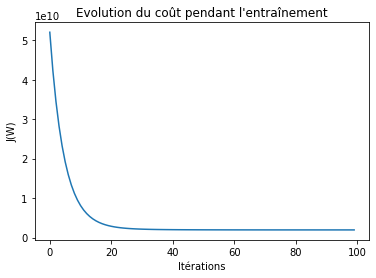

In [58]:
plt.plot(history)
plt.xlabel("Itérations")
plt.ylabel("J(W)")
plt.title("Evolution du coût pendant l\'entraînement")
plt.show()

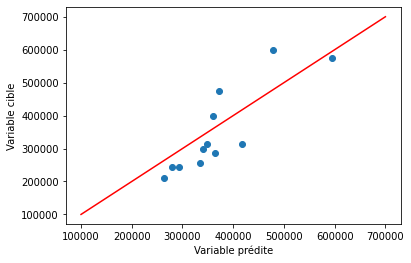

In [59]:
plt.scatter(lin_reg.predict(x_test_std), y_test)
plt.plot(np.arange(100000, 700000), np.arange(100000, 700000), color='red')
plt.ylabel('Variable cible')
plt.xlabel('Variable prédite')
plt.show()

In [60]:
lin_reg._w

array([[336659.48619852],
       [107027.02635439],
       [ -2707.02020966]])